Choose option 
 1. Provide File name : 
 2. Choose default file:2
File uploaded successfully!
Processing file
File Processed
Following County's housing price data is available
	 CA
	 ALAMEDA
	 AMADOR
	 BUTTE
	 CALAVERAS
	 CONTRA-COSTA
	 DEL NORTE
	 EL DORADO
	 FRESNO
	 GLENN
	 HUMBOLDT
	 KERN
	 KINGS
	 LAKE
	 LASSEN
	 LOS ANGELES
	 MADERA
	 MARIN
	 MARIPOSA
	 MENDOCINO
	 MERCED
	 MONO
	 MONTEREY
	 NAPA
	 NEVADA
	 ORANGE
	 PLACER
	 PLUMAS
	 RIVERSIDE
	 SACRAMENTO
	 SAN BENITO
	 SAN BERNARDINO
	 SAN DIEGO
	 SAN FRANCISCO
	 SAN JOAQUIN
	 SAN LUIS OBISPO
	 SAN MATEO
	 SANTA BARBARA
	 SANTA CLARA
	 SANTA CRUZ
	 SHASTA
	 SISKIYOU
	 SOLANO
	 SONOMA
	 STANISLAUS
	 SUTTER
	 TEHAMA
	 TULARE
	 TUOLUMNE
	 VENTURA
	 YOLO
	 YUBA
	 LOS ANGELES METROPOLITAN AREA
	 S.F. BAY AREA
	 INLAND EMPIRE
Enter County name from above list to plot price trend graph 
Enter '0' to exit: CA


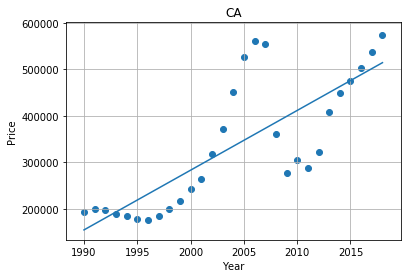

Want to predict prices ? 
 If yes then enter year 
 else press 0 to go back2020
Predicted price of County CA in the year 2020 is 539950.443222
Want to predict prices ? 
 If yes then enter year 
 else press 0 to go back0
going back..
Following County's housing price data is available
	 CA
	 ALAMEDA
	 AMADOR
	 BUTTE
	 CALAVERAS
	 CONTRA-COSTA
	 DEL NORTE
	 EL DORADO
	 FRESNO
	 GLENN
	 HUMBOLDT
	 KERN
	 KINGS
	 LAKE
	 LASSEN
	 LOS ANGELES
	 MADERA
	 MARIN
	 MARIPOSA
	 MENDOCINO
	 MERCED
	 MONO
	 MONTEREY
	 NAPA
	 NEVADA
	 ORANGE
	 PLACER
	 PLUMAS
	 RIVERSIDE
	 SACRAMENTO
	 SAN BENITO
	 SAN BERNARDINO
	 SAN DIEGO
	 SAN FRANCISCO
	 SAN JOAQUIN
	 SAN LUIS OBISPO
	 SAN MATEO
	 SANTA BARBARA
	 SANTA CLARA
	 SANTA CRUZ
	 SHASTA
	 SISKIYOU
	 SOLANO
	 SONOMA
	 STANISLAUS
	 SUTTER
	 TEHAMA
	 TULARE
	 TUOLUMNE
	 VENTURA
	 YOLO
	 YUBA
	 LOS ANGELES METROPOLITAN AREA
	 S.F. BAY AREA
	 INLAND EMPIRE
Enter County name from above list to plot price trend graph 
Enter '0' to exit: 0
Exiting..
 Done


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



class LinearModel(object):
    def __init__(self, filename=None):
        self.x_axis = None
        self.y_axis = None
        self.graph_title = None
        self.Model = None

        if filename:
            self.filename = filename
            self.df = pd.read_excel(self.filename, sheet_name='Median Price', skiprows=7)
        else:
            self.filename = 'https://www.car.org/-/media/CAR/Documents/Industry-360/Excel/201810-MedianPricesofExistingDetachedHomesHistoricalData.xls?la=en&hash=D2E304B8A36221C4704D0D1DFAC34B82437F9B83'
            self.df = pd.read_excel(self.filename, sheet_name='Median Price', skiprows=7)

    def process_file(self):
        self.df.columns.values[0]='Year' #rename column to year
        self.df.dropna(axis='columns', how='all', inplace=True) #drop columns with no values
        self.df['Year'] = pd.DatetimeIndex(self.df['Year']).year #Extract year from column values
        self.df = self.df.groupby(['Year'], as_index=False).mean() # calculate avg price in year
        self.df.fillna(0, inplace=True) #replace NAN wih 0
        self.df.rename(columns=lambda x: x.lower(), inplace=True) # column names to lowecase

    def __linear_reg(self, ip):
        self.x_axis = np.array(self.df[self.df[ip] > 0]['year'])
        #self.x_axis = x
        self.y_axis = y = np.array(self.df[self.df[ip]>0][ip])
        self.graph_title = ip
        self.model = LinearRegression()
        self.model.fit(self.x_axis[:, np.newaxis], self.y_axis)
        plt.plot(self.x_axis, self.model.predict(self.x_axis[:, np.newaxis]))


    def plot_graph(self, ip):
        self.__linear_reg(ip)
        plt.title(self.graph_title.upper())
        plt.ylabel('Price')
        plt.xlabel('Year')
        plt.grid()
        plt.scatter(self.x_axis, self.y_axis)
        plt.show()
        #display.clear_output(wait=True) #display o/p in jupyter notebook

    def predict_prices(self, x):
        price = self.model.predict([[x]])
        print("Predicted price of County %s in the year %d is %f" %(self.graph_title.upper(), x, price))


def main():
    while True:
        ip = int(input("Choose option \n 1. Provide File name : \n 2. Choose default file:"))
        if ip == 1:
            ip_file = input('Provide File name with full path \n Note:only excel formats are supported')
            try:
                a = LinearModel(ip_file)
            except:
                print("Error: Provide a valid filename with full path \n Note:Only excel file format is supported")
                continue
            else:
                print("File uploaded successfully!")
        else:
            ip_file = None
            try:
                a = LinearModel(ip_file)
            except:
                print("Error in uploading file, Try after sometime ..")
                continue
            else:
                print("File uploaded successfully!")

        print("Processing file")
        a.process_file()
        print("File Processed")
        break
    while True:
        print("Following County's housing price data is available")
        for i in a.df.columns.values[1:]:
            print("\t", i.upper())
        ip_city = input("Enter County name from above list to plot price trend graph \nEnter '0' to exit: ")
        ip_city = ip_city.lower()
        if ip_city == '0':
            print("Exiting..\n Done")
            break
        elif ip_city in a.df.columns:
            a.plot_graph(ip_city)

            while True:
                ip = int(input("Want to predict prices ? \n If yes then enter year \n else press 0 to go back"))
                if ip == 0:
                    print("going back..")
                    break
                else:
                    a.predict_prices(ip)
                    continue

            continue
        else:
            print("Error: Please enter a valid County name")
            continue


main() # calling function
